<a href="https://colab.research.google.com/github/Yuanzihui0810/pytorch_exercise/blob/main/Pytorch_transformstosave_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transforms

Data does not always come in its final processed form that is required
for training machine learning algorithms. We use **transforms** to
perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters -**`transform` to modify the
features** and **`target_transform` to modify the labels** - that accept
callables containing the transformation logic. The
[torchvision.transforms](https://pytorch.org/vision/stable/transforms.html)
module offers several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are
integers. For training, we need the features as normalized tensors, and
the labels as **one-hot** encoded tensors. To make these transformations, we
use `ToTensor` and `Lambda`.


In [2]:
import torch #cs
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

In [ ]:
ds = datasets.FashionMNIST(
    root="data", # 下载路径
    train=True, # 加载训练集 False是训练集 默认加载训练集
    download=True, # 如果该数据集尚未存在于指定的路径 则会下载
    transform=ToTensor(), # PIL图像格式 转换成 PyTorch张量Tensor
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
    # transform = Lambda(lambda x: <自定义操作>) 进行自定义操作
    # lambda建立标签scatter_(0, torch.tensor(y), value=1)转换为onehot编码
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.2MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 200kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.74MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.06MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# 数据集内容
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()

In [ ]:
# 数据内容
ds[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
ds[0][0].shape

torch.Size([1, 28, 28])

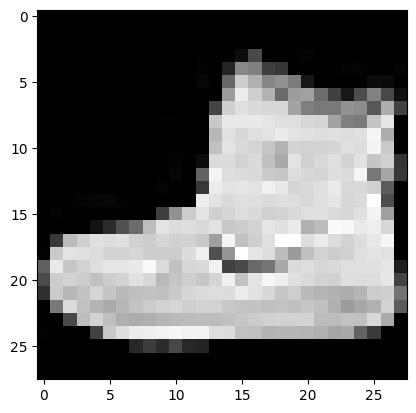

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(ds[0][0].squeeze(), cmap="gray")

## ToTensor()

[ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor)
converts a PIL image or NumPy `ndarray` into a `FloatTensor`. and scales
the image\'s pixel intensity values in the range \[0., 1.\]


In [ ]:
import numpy as np

transform = ToTensor()
random_array = np.random.rand(28,28,1) #(height, width, channels)
transform(random_array).shape #(channels, height, width)

torch.Size([1, 28, 28])

## Lambda Transforms

Lambda transforms apply any user-defined lambda function. Here, we
define a function to turn the integer into a one-hot encoded tensor. It
first creates a zero tensor of size 10 (the number of labels in our
dataset) and calls
[scatter\_](https://pytorch.org/docs/stable/generated/torch.Tensor.scatter_.html)
which assigns a `value=1` on the index as given by the label `y`.


In [ ]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
# scatter_原地操作 dim指定操作的维度 index指定值分配的索引位置 value赋的值
# or target_transform = Lambda(lambda y: torch.eye(10)[y])

## Data Augmentation
[Transforming and augmenting images](https://pytorch.org/vision/stable/transforms.html)

常用数据增强方法：\
RandomVerticalFlip()：随机垂直翻转。\
RandomResizedCrop()：随机裁剪并调整图像大小。\
RandomAffine()：应用随机仿射变换（如旋转、平移、缩放、剪切等）。\
GaussianBlur()：随机对图像应用高斯模糊。\
RandomErasing()：在图像上随机擦除部分区域。

In [ ]:
# Image Classification
import torch
from torchvision.transforms import transforms

img = ds[0][0]

transforms1 = transforms.Compose([
    transforms.RandomRotation(30), # 随机旋转图片，范围是 [-30, 30] 度
    transforms.RandomHorizontalFlip(), # 随机水平翻转图片
    # ToTensor(),
])

img = transforms1(img)

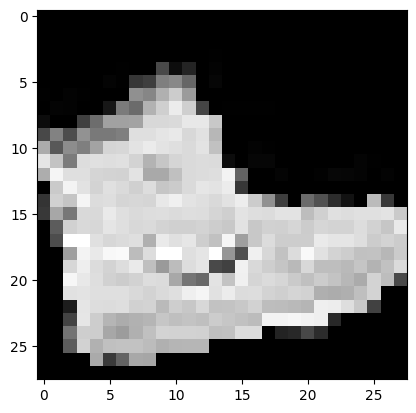

In [ ]:
plt.imshow(img.squeeze(), cmap="gray")


------------------------------------------------------------------------


# Build the Neural Network

Neural networks comprise of layers/modules that perform operations on
data. The [torch.nn](https://pytorch.org/docs/stable/nn.html) namespace
provides all the building blocks you need to build your own neural
network. Every module in PyTorch subclasses the
[nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
A neural network is a module itself that consists of other modules
(layers). This nested structure allows for building and managing complex
architectures easily.

In the following sections, we\'ll build a neural network to classify
images in the FashionMNIST dataset.


In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Get Device for Training

We want to be able to train our model on a hardware accelerator like the
GPU or MPS, if available. Let\'s check to see if
[torch.cuda](https://pytorch.org/docs/stable/notes/cuda.html) or
[torch.backends.mps](https://pytorch.org/docs/stable/notes/mps.html) are
available, otherwise we use the CPU.


In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device") # 确定是gpu跑

Using cuda device


## Define the Class

We define our neural network by subclassing `nn.Module`, and initialize
the neural network layers in `__init__`. Every `nn.Module` subclass
implements the operations on input data in the `forward` method.


In [ ]:
class NeuralNetwork(nn.Module): # 继承nn.Module父类 实现init forward两个主要方法
    """
    __init__ 方法:
    是模型的构造函数，用于初始化网络的各个层。
    层：
    基础层：
    全连接层：nn.Linear(in_features, out_features)
    卷积层：nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
    池化层：nn.MaxPool2d(kernel_size, stride, padding)
    正则化层：
    批归一化层：nn.BatchNorm2d(num_features)
    Dropout层：nn.Dropout(p) p是丢弃神经元概率
    递归层：
    以及nn.LSTM, nn.GRU

    激活函数：
    nn.ReLU()
    nn.Sigmoid()
    nn.Tanh()
    nn.LeakyReLU()
    nn.Softmax(dim) 多分类
    """

    def __init__(self):
        super().__init__() # 继承nn.Module中的所有功能
        self.flatten = nn.Flatten() # 将输入的28x28图像展平为一个一维向量
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            # nn.Softmax(1)
        ) # 这里用了nn.Sequential 可以将多个层按顺序组合

    def forward(self, x): # 前向传播 应用
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
# 逐层定义
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 512)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(512, 10)
        # self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        logits = self.fc3(x)
        # probs = self.softmax(logits)
        return logits

We create an instance of `NeuralNetwork`, and move it to the `device`,
and print its structure.


In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


To use the model, we pass it the input data. This executes the model\'s
`forward`, along with some [background
operations](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866).
Do not call `model.forward()` directly!

Calling the model on the input returns a 2-dimensional tensor with dim=0
corresponding to each output of 10 raw predicted values for each class,
and dim=1 corresponding to the individual values of each output. We get
the prediction probabilities by passing it through an instance of the
`nn.Softmax` module.


In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
print(f"logits: {logits}")

pred_probab = nn.Softmax(dim=1)(logits)
print(f"pred_probab: {pred_probab}")

y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

logits: tensor([[-0.0089,  0.0311, -0.0209, -0.0732, -0.0453,  0.0602, -0.0100,  0.0629,
          0.0722,  0.1066]], device='cuda:0', grad_fn=<AddmmBackward0>)
pred_probab: tensor([[0.0972, 0.1012, 0.0961, 0.0912, 0.0938, 0.1042, 0.0971, 0.1045, 0.1055,
         0.1092]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([9], device='cuda:0')


------------------------------------------------------------------------


## Model Layers

Let\'s break down the layers in the FashionMNIST model. To illustrate
it, we will take a sample minibatch of 3 images of size 28x28 and see
what happens to it as we pass it through the network.


In [ ]:
input_image = torch.rand(3,1,28,28)
print(input_image.size())

torch.Size([3, 1, 28, 28])


### nn.Flatten

We initialize the
[nn.Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)
layer to convert each 2D 28x28 image into a contiguous array of 784
pixel values ( the minibatch dimension (at dim=0) is maintained).


In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


### nn.Linear

The [linear
layer](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
is a module that applies a linear transformation on the input using its
stored weights and biases.


In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### nn.ReLU

Non-linear activations are what create the complex mappings between the
model\'s inputs and outputs. They are applied after linear
transformations to introduce *nonlinearity*, helping neural networks
learn a wide variety of phenomena.

In this model, we use
[nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)
between our linear layers, but there\'s other activations to introduce
non-linearity in your model.


In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.3150,  0.0366,  0.3891,  0.1197, -0.0540, -0.5567, -0.0742, -0.1864,
          0.1171, -0.0140,  0.3528,  0.0904, -0.3077,  0.1754, -0.3865,  0.0214,
          0.5198,  0.3332, -0.1507,  0.2487],
        [ 0.2977,  0.4671,  0.2803, -0.0269,  0.3137, -0.3235,  0.4250, -0.2669,
         -0.0405,  0.0422,  0.5966,  0.3578,  0.0543,  0.0685, -0.3848, -0.0638,
          0.3745,  0.5006, -0.2912, -0.0322],
        [ 0.3518,  0.3402,  0.3476,  0.0563,  0.3652, -0.5894,  0.1897,  0.0168,
          0.0221, -0.0169,  0.1602,  0.3581, -0.2244,  0.2580, -0.6708,  0.1210,
          0.4275,  0.4231,  0.0044, -0.0019]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.3150, 0.0366, 0.3891, 0.1197, 0.0000, 0.0000, 0.0000, 0.0000, 0.1171,
         0.0000, 0.3528, 0.0904, 0.0000, 0.1754, 0.0000, 0.0214, 0.5198, 0.3332,
         0.0000, 0.2487],
        [0.2977, 0.4671, 0.2803, 0.0000, 0.3137, 0.0000, 0.4250, 0.0000, 0.0000,
         0.0422, 0.5966, 0.3578, 0.0543, 0.0685, 0.00

### nn.Sequential

[nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)
is an ordered container of modules. The data is passed through all the
modules in the same order as defined. You can use sequential containers
to put together a quick network like `seq_modules`.


In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

print(f"logits: {logits}")

logits: tensor([[-0.0703,  0.0237, -0.0885, -0.0026, -0.2140, -0.1440,  0.1006,  0.0778,
          0.0777,  0.1776],
        [-0.0546,  0.0092, -0.2233, -0.0450, -0.1235, -0.2716,  0.1285,  0.0916,
          0.1684,  0.2524],
        [-0.1561,  0.0042, -0.2865, -0.2390, -0.1653, -0.1451,  0.0744,  0.0293,
          0.0780,  0.0985]], grad_fn=<AddmmBackward0>)


### nn.Softmax

The last linear layer of the neural network returns [logits]{.title-ref}
- raw values in \[-infty, infty\] - which are passed to the
[nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)
module. The logits are scaled to values \[0, 1\] representing the
model\'s predicted probabilities for each class. `dim` parameter
indicates the dimension along which the values must sum to 1.


In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

print(f"pred_probab: {pred_probab}")

pred_probab: tensor([[0.0932, 0.1024, 0.0915, 0.0997, 0.0807, 0.0866, 0.1105, 0.1081, 0.1080,
         0.1194],
        [0.0941, 0.1003, 0.0795, 0.0950, 0.0878, 0.0758, 0.1130, 0.1089, 0.1176,
         0.1279],
        [0.0910, 0.1068, 0.0799, 0.0837, 0.0902, 0.0920, 0.1146, 0.1095, 0.1150,
         0.1174]], grad_fn=<SoftmaxBackward0>)


## Model Parameters
================

Many layers inside a neural network are *parameterized*, i.e. have
associated weights and biases that are optimized during training.
Subclassing `nn.Module` automatically tracks all fields defined inside
your model object, and makes all parameters accessible using your
model\'s `parameters()` or `named_parameters()` methods.

In this example, we iterate over each parameter, and print its size and
a preview of its values.


In [ ]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
            Linear-4                  [-1, 512]         262,656
              ReLU-5                  [-1, 512]               0
            Linear-6                   [-1, 10]           5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.55
Estimated Total Size (MB): 2.58
----------------------------------------------------------------


In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


Layer: fc1.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0139, -0.0218, -0.0087,  ..., -0.0075, -0.0204, -0.0097],
        [-0.0317,  0.0154,  0.0182,  ...,  0.0105, -0.0199,  0.0330]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: fc1.bias | Size: torch.Size([512]) | Values : tensor([-0.0054, -0.0099], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: fc2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0117,  0.0358, -0.0192,  ...,  0.0155,  0.0077, -0.0388],
        [-0.0037,  0.0182, -0.0024,  ..., -0.0126, -0.0123, -0.0243]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: fc2.bias | Size: torch.Size([512]) | Values : tensor([0.004

# Automatic Differentiation with `torch.autograd`

When training neural networks, the most frequently used algorithm is
**back propagation**. In this algorithm, parameters (model weights) are
adjusted according to the **gradient** of the loss function with respect
to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation
engine called `torch.autograd`. It supports automatic computation of
gradient for any computational graph.

Consider the simplest one-layer neural network, with input `x`,
parameters `w` and `b`, and some loss function. It can be defined in
PyTorch in the following manner:


In [ ]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output

# requires_grad=True记录计算过程 反向计算梯度
# 或者后期x.requires_grad_(True)
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

# 前向传播
z = torch.matmul(x, w)+b # 矩阵乘法加偏置

# 损失函数
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y) # 二元交叉熵

## Tensors, Functions and Computational graph

This code defines the following **computational graph**:

![](https://pytorch.org/tutorials/_static/img/basics/comp-graph.png)

In this network, `w` and `b` are **parameters**, which we need to
optimize. Thus, we need to be able to compute the gradients of loss
function with respect to those variables. In order to do that, we set
the `requires_grad` property of those tensors.


<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>
<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">
<p>You can set the value of <code>requires_grad</code> when creating atensor, or later by using <code>x.requires_grad_(True)</code> method.</p>
</div>


A function that we apply to tensors to construct computational graph is
in fact an object of class `Function`. This object knows how to compute
the function in the *forward* direction, and also how to compute its
derivative during the *backward propagation* step. A reference to the
backward propagation function is stored in `grad_fn` property of a
tensor. You can find more information of `Function` [in the
documentation](https://pytorch.org/docs/stable/autograd.html#function).


In [ ]:
# 每个张量都通过grad_fn属性，记录了生成该张量的操作
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7f9a8219f310>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f9a8219f9a0>


In [ ]:
# 可视化grad_fn
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=4541ce57d7d7d2e8efa2be065a766d9f1c305a419f7d25f784639929feb39741
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


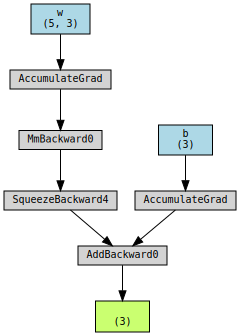

In [ ]:
import torch
from torchviz import make_dot

x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

# 使用 make_dot 可视化计算图
dot = make_dot(z, params={'w': w, 'b': b})
dot.render("computation_graph", format="png")  # 保存为 PNG 图片
dot

1. 蓝色节点（w 和 b）：
模型的参数。
w 和 b 分别是权重矩阵（w (5, 3)）和偏置向量（b (3)），它们都启用了梯度跟踪。
梯度会通过反向传播累积到这些参数中。
2. 灰色节点：
每个灰色节点代表一个反向传播的操作（Backward 函数）。
例如：
* AccumulateGrad: 用于累积梯度到 w 和 b 的 .grad 属性中。
* MmBackward0: 矩阵乘法的反向传播操作。
* SqueezeBackward4: 与 z 的形状调整有关的操作。
* AddBackward0: 对 z = matmul(x, w) + b 中的加法执行反向传播。
3. 绿色节点（最终输出）：
绿色节点表示计算图的最终输出张量，这里是损失值 loss。
损失值通过反向传播开始，逐层向上计算梯度。

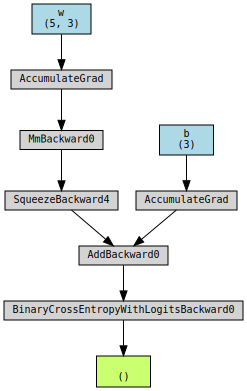

In [ ]:
dot = make_dot(loss, params={'w': w, 'b': b})
dot.render("computation_graph", format="png")  # 保存为 PNG 图片
dot

## Computing Gradients


To optimize weights of parameters in the neural network, we need to
compute the derivatives of our loss function with respect to parameters,
namely, we need $\frac{\partial loss}{\partial w}$ and
$\frac{\partial loss}{\partial b}$ under some fixed values of `x` and
`y`. To compute those derivatives, we call `loss.backward()`, and then
retrieve the values from `w.grad` and `b.grad`:


In [ ]:
# 梯度是通过调用loss.backward()自动计算的
loss.backward()

# 可以通过参数的.grad属性获取梯度值
print(w.grad)
print(b.grad)

tensor([[0.2290, 0.2617, 0.2760],
        [0.2290, 0.2617, 0.2760],
        [0.2290, 0.2617, 0.2760],
        [0.2290, 0.2617, 0.2760],
        [0.2290, 0.2617, 0.2760]])
tensor([0.2290, 0.2617, 0.2760])


<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>
<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">
<ul>
<li>We can only obtain the <code>grad</code> properties for the leafnodes of the computational graph, which have <code>requires_grad</code> propertyset to <code>True</code>. For all other nodes in our graph, gradients will not beavailable.
<li>leafnodes是指计算图中用户直接创建的张量。
<li>We can only perform gradient calculations using<code>backward</code> once on a given graph, for performance reasons. If we needto do several <code>backward</code> calls on the same graph, we need to pass<code>retain_graph=True</code> to the <code>backward</code> call.</li>
</ul>
</div>



## Disabling Gradient Tracking


By default, all tensors with `requires_grad=True` are tracking their
computational history and support gradient computation. However, there
are some cases when we do not need to do that, for example, when we have
trained the model and just want to apply it to some input data, i.e. we
only want to do *forward* computations through the network. We can stop
tracking computations by surrounding our computation code with
`torch.no_grad()` block:


In [ ]:
# 方法1：torch.no_grad()是一个上下文管理器，用于临时禁用梯度计算。

z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


Another way to achieve the same result is to use the `detach()` method
on the tensor:


In [ ]:
# 方法2：使用detach()方法
z = torch.matmul(x, w)+b
# detach()方法会返回一个新的张量，与原始张量共享数据内存，但不会记录计算历史。
z_det = z.detach()
print(z_det.requires_grad)

False


There are reasons you might want to disable gradient tracking:

1. To mark some parameters in your neural network as **frozen parameters**.
2. To **speed up computations** when you are only doing forward pass, because computations on tensors that do not track gradients would be more efficient.


## More on Computational Graphs

Conceptually, autograd keeps a record of data (tensors) and all executed
operations (along with the resulting new tensors) in a directed acyclic
graph (DAG 有向无环图) consisting of
[Function](https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
objects. In this DAG, leaves are the input tensors, roots are the output
tensors. By tracing this graph from roots to leaves, you can
automatically compute the gradients using the chain rule(链式法则).

In a forward pass, autograd does two things simultaneously:

-   执行：run the requested operation to compute a resulting tensor
-   记录：maintain the operation's *gradient function* in the DAG.

The backward pass kicks off when `.backward()` is called on the DAG
root. `autograd` then:

-   计算：computes the gradients from each `.grad_fn`,
-   累计梯度：accumulates them in the respective tensor's `.grad` attribute
-   链式：using the chain rule, propagates all the way to the leaf tensors.

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>
<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">
<p>An important thing to note is that the graph is recreated from scratch; after each<code>.backward()</code> call, autograd starts populating a new graph. This isexactly what allows you to use control flow statements in your model;you can change the shape, size and operations at every iteration ifneeded.</p>
</div>


## Optional Reading: Tensor Gradients and Jacobian Products

In many cases, we have a scalar loss function, and we need to compute
the gradient with respect to some parameters. However, there are cases
when **the output function is an arbitrary tensor**. In this case, PyTorch
allows you to compute so-called **Jacobian product**, and not the actual
gradient.

For a vector function $\vec{y}=f(\vec{x})$, where
$\vec{x}=\langle x_1,\dots,x_n\rangle$ and
$\vec{y}=\langle y_1,\dots,y_m\rangle$, a gradient of $\vec{y}$ with
respect to $\vec{x}$ is given by **Jacobian matrix**:

$$\begin{aligned}
J=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)
\end{aligned}$$

Instead of computing the Jacobian matrix itself, PyTorch allows you to
compute **Jacobian Product** $v^T\cdot J$ for a given input vector
$v=(v_1 \dots v_m)$.(通过这种方式，可以避免构造完整的雅可比矩阵，节省内存。) This is achieved by calling `backward` with $v$ as
an argument. The size of $v$ should be the same as the size of the
original tensor, with respect to which we want to compute the product:


In [ ]:
inp = torch.eye(4, 5, requires_grad=True) # 创建4x5单位矩阵，启用梯度
out = (inp+1).pow(2).t() # 每个元素加1，平方，最后转置

out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")

# 注意：第二次调用backward()时，梯度值会累积。
# PyTorch默认会将新计算的梯度加到.grad属性中，而不是覆盖。
# 梯度累计机制可以支持小批量梯度下降，多任务学习或多来源梯度优化，提供对梯度的后处理灵活性。
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")

inp.grad.zero_() # 清零
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


Notice that when we call `backward` for the second time with the same
argument, the value of the gradient is different. This happens because
when doing `backward` propagation, PyTorch **accumulates the
gradients**, i.e. the value of computed gradients is added to the `grad`
property of all leaf nodes of computational graph. If you want to
compute the proper gradients, you need to zero out the `grad` property
before. In real-life training an *optimizer* helps us to do this.


<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>
<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">
<p>Previously we were calling <code>backward()</code> function withoutparameters. This is essentially equivalent to calling<code>backward(torch.tensor(1.0))</code>, which is a useful way to compute thegradients in case of a scalar-valued function, such as loss duringneural network training.</p>
</div>


------------------------------------------------------------------------


## Further Reading

-   [Autograd
    Mechanics](https://pytorch.org/docs/stable/notes/autograd.html)


# Optimizing Model Parameters


Now that we have a model and data it\'s time to train, validate and test
our model by optimizing its parameters on our data. Training a model is
an iterative process; in each iteration the model makes a guess about
the output, calculates the error in its guess (*loss*), collects the
derivatives of the error with respect to its parameters (as we saw in
the [previous section](autograd_tutorial.html)), and **optimizes** these
parameters using gradient descent. For a more detailed walkthrough of
this process, check out this video on [backpropagation from
3Blue1Brown](https://www.youtube.com/watch?v=tIeHLnjs5U8).

Prerequisite Code
-----------------

We load the code from the previous sections on [Datasets &
DataLoaders](data_tutorial.html) and [Build
Model](buildmodel_tutorial.html).


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# Minibatch
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)
# train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True, num_workers=4)

# Define
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

## Hyperparameters

Hyperparameters are adjustable parameters that let you control the model
optimization process. Different hyperparameter values can impact model
training and convergence rates ([read
more](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html)
about hyperparameter tuning)

We define the following hyperparameters for training:

**Number of Epochs** - the number times to iterate over the dataset

**Batch Size** - the number of data samples propagated through the network before the parameters are updated

**Learning Rate** - how much to update models parameters at each
        batch/epoch. Smaller values yield slow learning speed, while
        large values may result in unpredictable behavior during
        training.


In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## Optimization Loop

Once we set our hyperparameters, we can then train and optimize our
model with an optimization loop. Each iteration of the optimization loop
is called an **epoch**.

Each epoch consists of two main parts:

**The Train Loop** - iterate over the training dataset and try
        to converge to optimal parameters.

**The Validation/Test Loop** - iterate over the test dataset to
        check if model performance is improving.

Let\'s briefly familiarize ourselves with some of the concepts used in
the training loop. Jump ahead to see the
`full-impl-label`{.interpreted-text role="ref"} of the optimization
loop.

Loss Function
-------------

When presented with some training data, our untrained network is likely
not to give the correct answer. **Loss function** measures the degree of
dissimilarity of obtained result to the target value, and it is the loss
function that we want to minimize during training. To calculate the loss
we make a prediction using the inputs of our given data sample and
compare it against the true data label value.

Common loss functions include
[nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss)
(Mean Square Error) for regression tasks, and
[nn.NLLLoss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss)
(Negative Log Likelihood) for classification.
[nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss)
combines `nn.LogSoftmax` and `nn.NLLLoss`.

We pass our model\'s output logits to `nn.CrossEntropyLoss`, which will
normalize the logits and compute the prediction error.


In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

## Optimizer

Optimization is the process of adjusting model parameters to reduce
model error in each training step. **Optimization algorithms** define
how this process is performed (in this example we use Stochastic
Gradient Descent). All optimization logic is encapsulated in the
`optimizer` object. Here, we use the SGD optimizer; additionally, there
are many [different
optimizers](https://pytorch.org/docs/stable/optim.html) available in
PyTorch such as ADAM and RMSProp, that work better for different kinds
of models and data.

We initialize the optimizer by registering the model\'s parameters that
need to be trained, and passing in the learning rate hyperparameter.


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Adam,RMSprop,Adagrad

如何选择优化器
1. 基于数据特性:

稀疏数据:使用 Adagrad 或 Adam。

非平稳目标函数:使用 RMSprop 或 Adam。

高维连续数据:使用 SGD（配合动量）。

2. 基于任务:

卷积神经网络（CNN）:SGD + 动量（通常表现较好）。Adam 也是常见选择。

循环神经网络（RNN/LSTM）:RMSprop 或 Adam。

微调预训练模型:AdamW，因其对权重衰减的处理更稳定。

Inside the training loop, optimization happens in three steps:

* Call `optimizer.zero_grad()` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.

* Backpropagate the prediction loss with a call to `loss.backward()`. PyTorch deposits the gradients of the loss w.r.t. each parameter.

* Once we have our gradients, we call `optimizer.step()` to adjust the parameters by the gradients collected in the backward pass.


## Full Implementation

We define `train_loop` that loops over our optimization code, and
`test_loop` that evaluates the model\'s performance against our test
data.


In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward() # 反向传播，计算梯度
        optimizer.step() # 使用优化器更新模型参数
        optimizer.zero_grad() # 清零梯度，避免梯度累积

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad(): # 禁用梯度计算（节省内存并加速计算）
        for X, y in dataloader:
            pred = model(X) # 前向传播，计算预测值
            test_loss += loss_fn(pred, y).item() # 累加损失值
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() # 计算正确预测的样本数

    # 计算平均损失和准确率
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to
`train_loop` and `test_loop`. Feel free to increase the number of epochs
to track the model\'s improving performance.


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.307666  [   64/60000]
loss: 2.294008  [ 6464/60000]
loss: 2.276087  [12864/60000]
loss: 2.257209  [19264/60000]
loss: 2.248857  [25664/60000]
loss: 2.207702  [32064/60000]
loss: 2.213538  [38464/60000]
loss: 2.179087  [44864/60000]
loss: 2.173460  [51264/60000]
loss: 2.132231  [57664/60000]
Test Error: 
 Accuracy: 45.9%, Avg loss: 2.136124 

Epoch 2
-------------------------------
loss: 2.153716  [   64/60000]
loss: 2.143166  [ 6464/60000]
loss: 2.081985  [12864/60000]
loss: 2.093915  [19264/60000]
loss: 2.056637  [25664/60000]
loss: 1.980167  [32064/60000]
loss: 2.008082  [38464/60000]
loss: 1.929737  [44864/60000]
loss: 1.935623  [51264/60000]
loss: 1.857150  [57664/60000]
Test Error: 
 Accuracy: 58.9%, Avg loss: 1.860050 

Epoch 3
-------------------------------
loss: 1.900856  [   64/60000]
loss: 1.870243  [ 6464/60000]
loss: 1.747531  [12864/60000]
loss: 1.787465  [19264/60000]
loss: 1.684533  [25664/60000]
loss: 1.630483  [32064/600

## Further Reading

-   [Loss
    Functions](https://pytorch.org/docs/stable/nn.html#loss-functions)
-   [torch.optim](https://pytorch.org/docs/stable/optim.html)
-   [Warmstart Training a
    Model](https://pytorch.org/tutorials/recipes/recipes/warmstarting_model_using_parameters_from_a_different_model.html)


# Save & Load Model

Save and Load the Model
=======================

In this section we will look at how to persist model state with saving,
loading and running model predictions.


In [ ]:
import torch
import torchvision.models as models

## Saving and Loading Model Weights

PyTorch models store the learned parameters in an internal state
dictionary, called `state_dict`. These can be persisted via the
`torch.save` method:


In [ ]:
model = models.vgg16(weights='IMAGENET1K_V1') # 加载预训练 VGG16 模型
# model.state_dict()只保存权重
torch.save(model.state_dict(), 'model_weights.pth') # 保存模型权重到文件

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 67.6MB/s]


To load model weights, you need to create an instance of the same model
first, and then load the parameters using `load_state_dict()` method.

In the code below, we set `weights_only=True` to limit the functions
executed during unpickling to only those necessary for loading weights.
Using `weights_only=True` is considered a best practice when loading
weights.


In [ ]:
model = models.vgg16() # 创建一个未训练的 VGG16 模型

# model.load_state_dict()：将加载的权重填充到模型中。
# weights_only=True 限制解压缩操作，仅加载权重，避免额外执行不必要的代码
model.load_state_dict(torch.load('model_weights.pth', weights_only=True)) # 加载保存的权重

model.eval() # 将模型设置为评估模式
# Dropout层会被禁用。
# BatchNorm会使用全局统计量。

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>be sure to call <code>model.eval()</code> method before inferencing to set the dropout and batch normalization layers to evaluation mode. Failing to do this will yield inconsistent inference results.</p>

</div>



## Saving and Loading Models with Shapes

When loading model weights, we needed to instantiate the model class
first, because the class defines the structure of a network. We might
want to save the structure of this class together with the model, in
which case we can pass `model` (and not `model.state_dict()`) to the
saving function:


In [ ]:
# 保存整个模型
torch.save(model, 'model.pth')

We can then load the model as demonstrated below.

As described in [Saving and loading
torch.nn.Modules](https://pytorch.org/docs/main/notes/serialization.html#saving-and-loading-torch-nn-modules),
saving `state_dict` is considered the best practice. However, below we
use `weights_only=False` because this involves loading the model, which
is a legacy use case for `torch.save`.


In [ ]:
# 不只保存权重
model = torch.load('model.pth', weights_only=False)

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>This approach uses Python <a href="https://docs.python.org/3/library/pickle.html">pickle</a> module when serializing the model, thus it relies on the actual class definition to be available when loading the model.</p>

</div>



## Related Tutorials

-   [Saving and Loading a General Checkpoint in
    PyTorch](https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_a_general_checkpoint.html)
-   [Tips for loading an nn.Module from a
    checkpoint](https://pytorch.org/tutorials/recipes/recipes/module_load_state_dict_tips.html?highlight=loading%20nn%20module%20from%20checkpoint)


------------------------------------------------------------------------
